In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

In [2]:
b_knn_y_test, b_knn_pred_test = np.load('results\\berri\\knn_out.npy')
b_knn_fpr,b_knn_tpr, b_knn_roc_auc= np.load('results\\berri\\knn_fpr_tpr.npy', allow_pickle=True)
b_ann_y_test, b_ann_pred_test = np.load('results\\berri\\ann_out.npy')
b_ann_fpr,b_ann_tpr, b_ann_roc_auc= np.load('results\\berri\\ann_fpr_tpr.npy', allow_pickle=True)

m1_knn_y_test, m1_knn_pred_test = np.load('results\\maison1\\knn_out.npy')
m1_knn_fpr,m1_knn_tpr, m1_knn_roc_auc= np.load('results\\maison1\\knn_fpr_tpr.npy', allow_pickle=True)
m1_ann_y_test, m1_ann_pred_test = np.load('results\\maison1\\ann_out.npy')
m1_ann_fpr,m1_ann_tpr, m1_ann_roc_auc= np.load('results\\maison1\\ann_fpr_tpr.npy', allow_pickle=True)

m2_knn_y_test, m2_knn_pred_test = np.load('results\\maison2\\knn_out.npy')
m2_knn_fpr,m2_knn_tpr, m2_knn_roc_auc= np.load('results\\maison2\\knn_fpr_tpr.npy', allow_pickle=True)
m2_ann_y_test, m2_ann_pred_test = np.load('results\\maison2\\ann_out.npy')
m2_ann_fpr,m2_ann_tpr, m2_ann_roc_auc= np.load('results\\maison2\\ann_fpr_tpr.npy', allow_pickle=True)



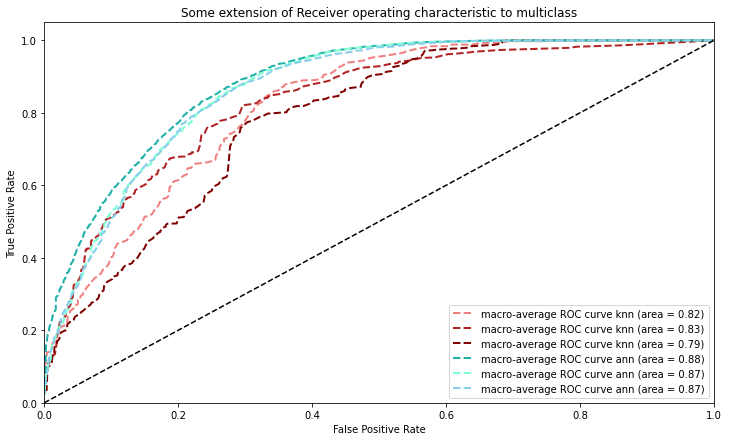

In [3]:
#roc curve stack comparing both models
name=['knn','knn','knn','ann','ann','ann']
fpr = [b_knn_fpr,m1_knn_fpr,m2_knn_fpr,b_ann_fpr,m1_ann_fpr,m2_ann_fpr]
tpr = [b_knn_tpr, m1_knn_tpr, m2_knn_tpr, b_ann_tpr,m1_ann_tpr, m2_ann_tpr]
roc = [b_knn_roc_auc, m1_knn_roc_auc, m2_knn_roc_auc, b_ann_roc_auc,m1_ann_roc_auc, m2_ann_roc_auc]
color = ['lightcoral','firebrick','maroon','lightseagreen','aquamarine','skyblue']


plt.figure(figsize=(12,7))
for n,f, t, r,c in zip(name,fpr,tpr,roc,color):
    plt.plot(
    f,
    t,
    label="macro-average ROC curve {} (area = {:0.2f})".format(n,r["macro"]),
    color=c,
    linestyle="dashed",
    linewidth=2,
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

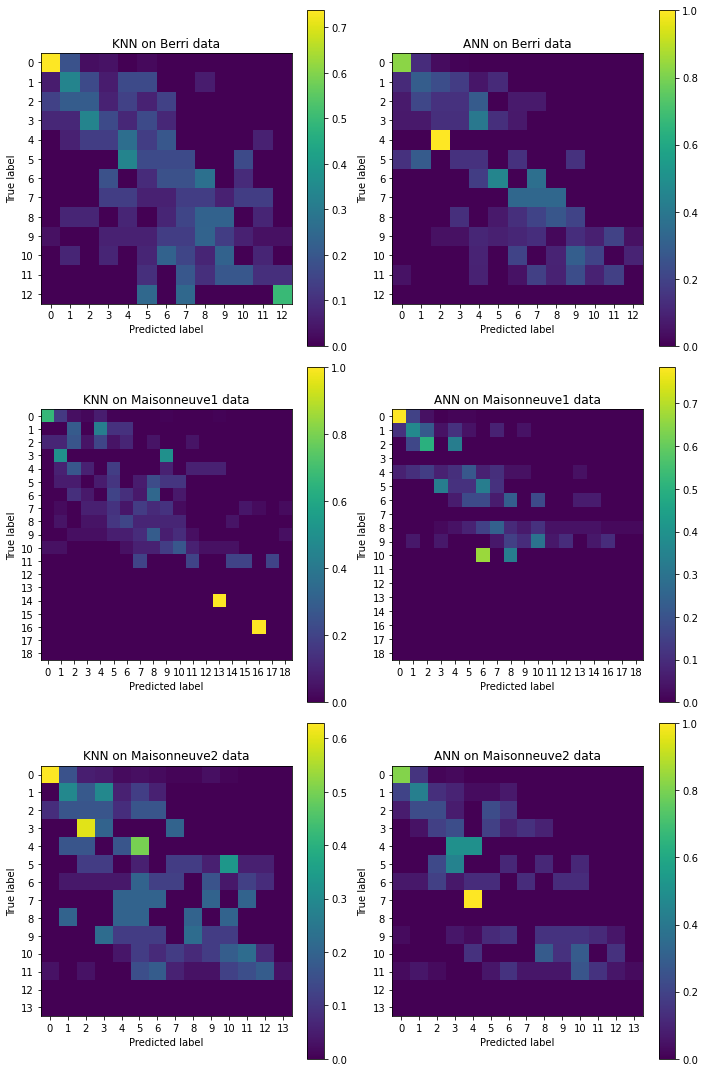

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

pred_test=[b_knn_y_test,b_ann_y_test,
           m1_knn_y_test,m1_ann_y_test,
           m2_knn_y_test,m2_ann_y_test]

y_test=[b_knn_pred_test,b_ann_pred_test,
        m1_knn_pred_test,m1_ann_pred_test,
        m2_knn_pred_test,m2_ann_pred_test]
name = ['KNN','ANN','KNN','ANN','KNN','ANN']
station = ['Berri','Berri','Maisonneuve1','Maisonneuve1','Maisonneuve2','Maisonneuve2']

for  name,station,model_train,model_test,ax in zip(name,station,pred_test,y_test,axes.flatten()):
    ConfusionMatrixDisplay.from_predictions(model_train,
                                            model_test,
                                            include_values=False,
                                            normalize='true',
                                            ax=ax,
                                            colorbar=True)
    ax.set_title('{} on {} data'.format(name,station))
    plt.tight_layout()
plt.savefig('images\\confusion_matrices',dpi=200)

In [3]:
b_knn_trn, b_knn_pred_test = np.load('results\\berri\\knn_trn_tst.npy')
b_ann_trn, b_ann_pred_test = np.load('results\\berri\\ann_trn_tst.npy')

m1_knn_trn, m1_knn_pred_test = np.load('results\\maison1\\knn_trn_tst.npy')
m1_ann_trn, m1_ann_pred_test = np.load('results\\maison1\\ann_trn_tst.npy')

m2_knn_trn, m2_knn_pred_test = np.load('results\\maison2\\knn_trn_tst.npy')
m2_ann_trn, m2_ann_pred_test = np.load('results\\maison2\\ann_trn_tst.npy')



In [7]:
b_knn_trn

1.0

In [31]:
item_list = np.array([b_knn_trn, b_knn_pred_test,b_ann_trn, b_ann_pred_test,
            m1_knn_trn, m1_knn_pred_test,m1_ann_trn, m1_ann_pred_test,
            m2_knn_trn, m2_knn_pred_test,m2_ann_trn, m2_ann_pred_test])

df = pd.DataFrame(item_list.reshape(1,12),
             columns=['b_knn_trn', 'b_knn_pred_test','b_ann_trn', 'b_ann_pred_test',
            'm1_knn_trn', 'm1_knn_pred_test','m1_ann_trn', 'm1_ann_pred_test',
            'm2_knn_trn', 'm2_knn_pred_test','m2_ann_trn', 'm2_ann_pred_test'])
df.to_csv('results\\all_accs.csv', index=False)